In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.dates as mdates
import opendatasets as od

#list all files under the input directory to find the exact path of LifeExpectancy.csv
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
!pip install opendatasets

In [22]:
dataset = 'https://www.kaggle.com/datasets/sandhyakrishnan02/latest-covid-19-dataset-worldwide'

In [23]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  tetianatkach


Your Kaggle Key:

  ········


100%|█████████████████████████████████████████████████████████████████████████████| 13.4M/13.4M [00:00<00:00, 23.1MB/s]


In [40]:
data_dir = '.\\latest-covid-19-dataset-worldwide'
os.listdir(data_dir)

['owid-covid-data.csv']

In [70]:
file_path = os.path.join(data_dir, 'owid-covid-data.csv')
covid = pd.read_csv(file_path)

print(covid.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [81]:
file_path = os.path.join(data_dir, 'owid-covid-data.csv')
data = pd.read_csv(file_path)

In [82]:
info = data.columns
print(info)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [79]:
a = data.date.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-01-01
The last date is: 2023-04-12


In [80]:
data.isnull().sum()

iso_code                                        0
continent                                   14352
location                                        0
date                                            0
total_cases                                 35741
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
excess_mortality                           292217
excess_mortality_cumulative_per_million    292217
Length: 67, dtype: int64

In [84]:
top = data[data['date'] == data['date'].max()]
world = top.groupby('location')[['total_cases', 'total_deaths']].sum().reset_index()
world.head()

location  total_cases  total_deaths
0     Afghanistan     211630.0        7884.0
1          Africa   13074358.0      258841.0
2         Albania     333897.0        3604.0
3         Algeria     271613.0        6881.0
4  American Samoa       8326.0          34.0

In [85]:
sumd=data.groupby("continent").sum()
sumd

iso_code  \
continent                                                          
Africa         DZADZADZADZADZADZADZADZADZADZADZADZADZADZADZAD...   
Asia           AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGA...   
Europe         ALBALBALBALBALBALBALBALBALBALBALBALBALBALBALBA...   
North America  AIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAA...   
Oceania        ASMASMASMASMASMASMASMASMASMASMASMASMASMASMASMA...   
South America  ARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGA...   

                                                        location  \
continent                                                          
Africa         AlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlge...   
Asia           AfghanistanAfghanistanAfghanistanAfghanistanAf...   
Europe         AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...   
North America  AnguillaAnguillaAnguillaAnguillaAnguillaAnguil...   
Oceania        American SamoaAmerican SamoaAmerican SamoaAmer...   
South America  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   

                                                            date  \
continent                                                          
Africa         2020-01-032020-01-042020-01-052020-01-062020-0...   
Asia           2020-01-032020-01-042020-01-052020-01-062020-0...   
Europe         2020-01-032020-01-042020-01-052020-01-062020-0...   
North America  2020-01-032020-01-042020-01-052020-01-062020-0...   
Oceania        2020-01-032020-01-042020-01-052020-01-062020-0...   
South America  2020-01-012020-01-022020-01-032020-01-042020-0...   

                total_cases    new_cases  new_cases_smoothed  total_deaths  \
continent                                                                    
Africa         8.355807e+09   13075600.0        1.307525e+07  1.833716e+08   
Asia           1.091860e+11  295847337.0        2.957656e+08  1.013916e+09   
Europe         1.172488e+11  248182478.0        2.481062e+08  1.343026e+09   
North America  6.765904e+10  123499175.0        1.234918e+08  1.100023e+09   
Oceania        4.647260e+09   14182484.0        1.417578e+07  9.160862e+06   
South America  4.071857e+10   68341184.0        6.824359e+07  1.001402e+09   

               new_deaths  new_deaths_smoothed  total_cases_per_million  ...  \
continent                                                                ...   
Africa           258851.0           258850.565             1.262868e+09  ...   
Asia            1628635.0          1628269.663             3.180521e+09  ...   
Europe          2038597.0          2038058.201             9.690001e+09  ...   
North America   1594725.0          1593652.029             4.423133e+09  ...   
Oceania           25935.0            25935.275             1.697886e+09  ...   
South America   1352944.0          1352590.261             1.326202e+09  ...   

               male_smokers  handwashing_facilities  \
continent                                             
Africa            1180810.8             1323771.072   
Asia              1804166.0             2247670.308   
Europe            1702745.2              337106.952   
North America      320212.0             1205787.946   
Oceania            421948.8              171746.796   
South America      235983.3              473481.245   

               hospital_beds_per_thousand  life_expectancy  \
continent                                                    
Africa                          72023.120       4428439.66   
Asia                           174053.880       4423846.20   
Europe                         265605.288       4579962.40   
North America                   63725.640       3693912.38   
Oceania                         32471.400       2026107.72   
South America                   29691.620       1270807.74   

               human_development_index    population  \
continent                                              
Africa                       35543.924  1.705689e+12   
Asia                         41531.581  5.646298e

In [88]:
deaths=sumd.total_deaths.sort_values(ascending=False) # Focusing on death count of each country
deaths

continent
Europe           1.343026e+09
North America    1.100023e+09
Asia             1.013916e+09
South America    1.001402e+09
Africa           1.833716e+08
Oceania          9.160862e+06
Name: total_deaths, dtype: float64

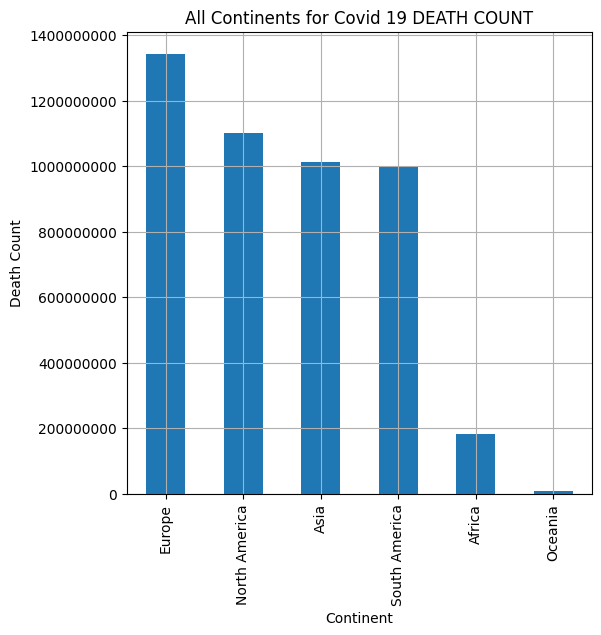

In [89]:
deaths.head(15).plot(figsize=(6,6),kind="bar",grid=True,xlabel="Continent",ylabel="Death Count", title="All Continents for Covid 19 DEATH COUNT")
plt.ticklabel_format(style='plain', axis='y')

In [91]:
yearwise=data.groupby('location')# Creating a new variable by group by function on Country/ Region
yearwise=list(yearwise) # Converting data in list.

In [92]:
data['year'] = pd.DatetimeIndex(data['date']).year

In [93]:
data.insert(loc=4, column="Year", value=data['year'])

In [94]:
Ukraine = data[data['location']=='Ukraine']

In [95]:
Ukraine

iso_code continent location        date  Year  total_cases  new_cases  \
281079      UKR    Europe  Ukraine  2020-01-03  2020          NaN        0.0   
281080      UKR    Europe  Ukraine  2020-01-04  2020          NaN        0.0   
281081      UKR    Europe  Ukraine  2020-01-05  2020          NaN        0.0   
281082      UKR    Europe  Ukraine  2020-01-06  2020          NaN        0.0   
281083      UKR    Europe  Ukraine  2020-01-07  2020          NaN        0.0   
...         ...       ...      ...         ...   ...          ...        ...   
282270      UKR    Europe  Ukraine  2023-04-08  2023    5484936.0        0.0   
282271      UKR    Europe  Ukraine  2023-04-09  2023    5484936.0        0.0   
282272      UKR    Europe  Ukraine  2023-04-10  2023    5484936.0        0.0   
282273      UKR    Europe  Ukraine  2023-04-11  2023    5484936.0        0.0   
282274      UKR    Europe  Ukraine  2023-04-12  2023    5484936.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  ...  \
281079                 NaN           NaN         0.0  ...   
281080                 NaN           NaN         0.0  ...   
281081                 NaN           NaN         0.0  ...   
281082                 NaN           NaN         0.0  ...   
281083                 NaN           NaN         0.0  ...   
...                    ...           ...         ...  ...   
282270            2711.714      111789.0         0.0  ...   
282271            2711.714      111789.0         0.0  ...   
282272            2711.714      111789.0         0.0  ...   
282273               0.000      111789.0         0.0  ...   
282274               0.000      111789.0         0.0  ...   

        handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
281079                     NaN                         8.8            72.06   
281080                     NaN                         8.8            72.06   
281081                     NaN                         8.8            72.06   
281082                     NaN                         8.8            72.06   
281083                     NaN                         8.8            72.06   
...                        ...                         ...              ...   
282270                     NaN                         8.8            72.06   
282271                     NaN                         8.8            72.06   
282272                     NaN                         8.8            72.06   
282273                     NaN                         8.8            72.06   
282274                     NaN                         8.8            72.06   

        human_development_index  population  \
281079                    0.779  39701744.0   
281080                    0.779  39701744.0   
281081                    0.779  39701744.0   
281082                    0.779  39701744.0   
281083                    0.779  39701744.0   
...                         ...         ...   
282270                    0.779  39701744.0   
282271                    0.779  39701744.0   
282272                    0.779  39701744.0   
282273                    0.779  39701744.0   
282274                    0.779  39701744.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
281079                                   NaN                          NaN   
281080                                   NaN                          NaN   
281081                                   NaN                          NaN   
281082                                   NaN                          NaN   
281083                                   NaN                          NaN   
...                                      ...                          ...   
282270                                   NaN                          NaN   
282271                                   NaN                          NaN   
282272                                   NaN                          NaN   
282273                       

In [96]:
Ukraine1 = Ukraine[["total_cases","total_tests","total_vaccinations","Year"]]

In [97]:
year=Ukraine1.groupby('Year').sum()

In [98]:
year

total_cases   total_tests  total_vaccinations
Year                                                
2020  6.513302e+07  4.136670e+08        0.000000e+00
2021  8.074201e+08  3.221985e+09        2.731414e+09
2022  1.805779e+09  6.331926e+08        1.540547e+09
2023  5.510239e+08  0.000000e+00        0.000000e+00

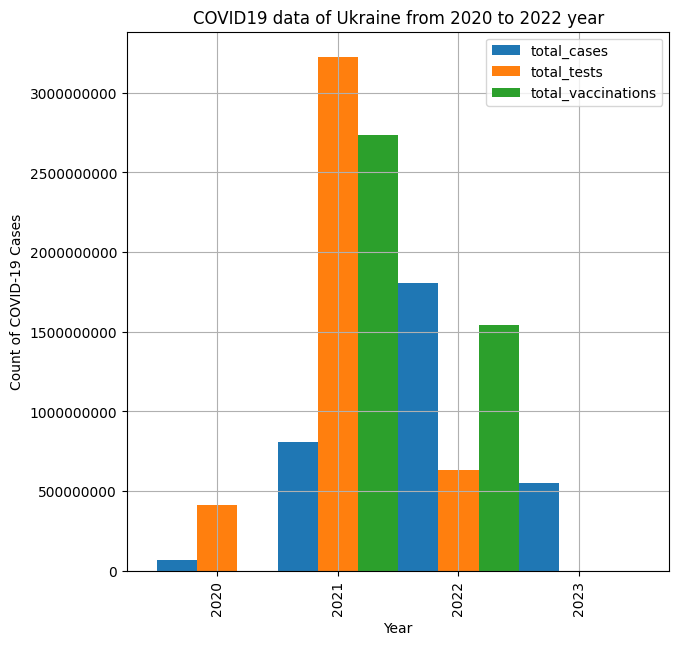

In [100]:
year.plot(figsize=(7,7),kind="bar",grid=True,xlabel="Year",ylabel="Count of COVID-19 Cases",width=1, title="COVID19 data of Ukraine from 2020 to 2022 year")
plt.ticklabel_format(style='plain', axis='y')

In [101]:
sumd=data.groupby("continent").sum()
sumd

iso_code  \
continent                                                          
Africa         DZADZADZADZADZADZADZADZADZADZADZADZADZADZADZAD...   
Asia           AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGA...   
Europe         ALBALBALBALBALBALBALBALBALBALBALBALBALBALBALBA...   
North America  AIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAAIAA...   
Oceania        ASMASMASMASMASMASMASMASMASMASMASMASMASMASMASMA...   
South America  ARGARGARGARGARGARGARGARGARGARGARGARGARGARGARGA...   

                                                        location  \
continent                                                          
Africa         AlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlge...   
Asia           AfghanistanAfghanistanAfghanistanAfghanistanAf...   
Europe         AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...   
North America  AnguillaAnguillaAnguillaAnguillaAnguillaAnguil...   
Oceania        American SamoaAmerican SamoaAmerican SamoaAmer...   
South America  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   

                                                            date       Year  \
continent                                                                     
Africa         2020-01-032020-01-042020-01-052020-01-062020-0...  137789319   
Asia           2020-01-032020-01-042020-01-052020-01-062020-0...  121347772   
Europe         2020-01-032020-01-042020-01-052020-01-062020-0...  132310205   
North America  2020-01-032020-01-042020-01-052020-01-062020-0...   99114201   
Oceania        2020-01-032020-01-042020-01-052020-01-062020-0...   58015704   
South America  2020-01-012020-01-022020-01-032020-01-042020-0...   33844514   

                total_cases    new_cases  new_cases_smoothed  total_deaths  \
continent                                                                    
Africa         8.355807e+09   13075600.0        1.307525e+07  1.833716e+08   
Asia           1.091860e+11  295847337.0        2.957656e+08  1.013916e+09   
Europe         1.172488e+11  248182478.0        2.481062e+08  1.343026e+09   
North America  6.765904e+10  123499175.0        1.234918e+08  1.100023e+09   
Oceania        4.647260e+09   14182484.0        1.417578e+07  9.160862e+06   
South America  4.071857e+10   68341184.0        6.824359e+07  1.001402e+09   

               new_deaths  new_deaths_smoothed  ...  handwashing_facilities  \
continent                                       ...                           
Africa           258851.0           258850.565  ...             1323771.072   
Asia            1628635.0          1628269.663  ...             2247670.308   
Europe          2038597.0          2038058.201  ...              337106.952   
North America   1594725.0          1593652.029  ...             1205787.946   
Oceania           25935.0            25935.275  ...              171746.796   
South America   1352944.0          1352590.261  ...              473481.245   

               hospital_beds_per_thousand  life_expectancy  \
continent                                                    
Africa                          72023.120       4428439.66   
Asia                           174053.880       4423846.20   
Europe                         265605.288       4579962.40   
North America                   63725.640       3693912.38   
Oceania                         32471.400       2026107.72   
South America                   29691.620       1270807.74   

               human_development_index    population  \
continent                                              
Africa                       35543.924  1.705689e+12   
Asia                         41531.581  5.646298e+12   
Europe                       44198.180  9.685572e+11   
North America                20796.410  7.182421e+11   
Oceania                      10248.524  5.386653e+10   
South America                10953.920  5.225232e+11   

               excess_mortality_cumulative_absolute  \
continent                                             
Africa             

In [102]:
All_con_sum=sumd.loc[["Africa","Asia","Europe","North America","Oceania","South America"]]
All_con_sum = All_con_sum[["total_cases","total_tests","total_vaccinations"]]

In [103]:
All_con_sum

total_cases   total_tests  total_vaccinations
continent                                                    
Africa         8.355807e+09  2.221336e+10        4.821564e+10
Asia           1.091860e+11  5.760145e+11        3.566777e+12
Europe         1.172488e+11  6.093176e+11        6.324806e+11
North America  6.765904e+10  3.817899e+11        5.052099e+11
Oceania        4.647260e+09  2.412398e+10        2.519467e+10
South America  4.071857e+10  6.196948e+10        3.714079e+11

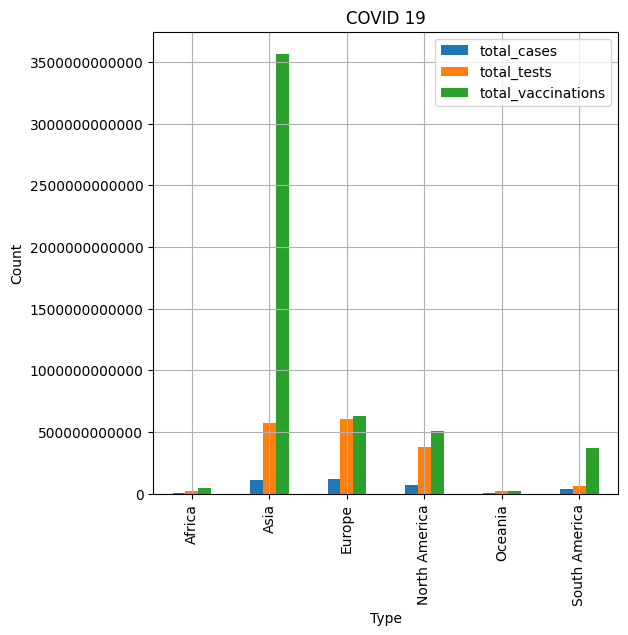

In [104]:
All_con_sum.plot(figsize=(6,6),kind="bar",grid=True,xlabel="Type",ylabel="Count", title="COVID 19")
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
#Show comparsion of total vaccinations in different continents of World.

In [105]:
print(data)

       iso_code continent     location        date  Year  total_cases  \
0           AFG      Asia  Afghanistan  2020-01-03  2020          NaN   
1           AFG      Asia  Afghanistan  2020-01-04  2020          NaN   
2           AFG      Asia  Afghanistan  2020-01-05  2020          NaN   
3           AFG      Asia  Afghanistan  2020-01-06  2020          NaN   
4           AFG      Asia  Afghanistan  2020-01-07  2020          NaN   
...         ...       ...          ...         ...   ...          ...   
302507      ZWE    Africa     Zimbabwe  2023-04-08  2023     264578.0   
302508      ZWE    Africa     Zimbabwe  2023-04-09  2023     264582.0   
302509      ZWE    Africa     Zimbabwe  2023-04-10  2023     264584.0   
302510      ZWE    Africa     Zimbabwe  2023-04-11  2023     264584.0   
302511      ZWE    Africa     Zimbabwe  2023-04-12  2023     264584.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  ...  \
0             0.0                 NaN           NaN

In [110]:
asia_vac = data[data['location'] == 'India']
europe_vac = data[data['location'] == 'Australia']
africa_vac = data[data['location'] == 'England']
north_vac = data[data['location'] == 'North America']
south_vac = data[data['location'] == 'South America']
oceania_vac = data[data['location'] == 'Bangladesh']

In [114]:
asia_vac = data[data['continent'] == 'Asia']
asia_vac = asia_vac[~asia_vac['total_vaccinations'].isnull()].copy()

europe_vac = data[data['continent'] == 'Europe']
europe_vac = europe_vac[~europe_vac['total_vaccinations'].isnull()].copy()

africa_vac = data[data['continent'] == 'Africa']
africa_vac = africa_vac[~africa_vac['total_vaccinations'].isnull()].copy()

north_vac = data[data['continent'] == 'North America']
north_vac = north_vac[~north_vac['total_vaccinations'].isnull()].copy()

south_vac = data[data['continent'] == 'South America']
south_vac = south_vac[~south_vac['total_vaccinations'].isnull()].copy()

oceania_vac = data[data['continent'] == 'Oceania']
oceania_vac = oceania_vac[~oceania_vac['total_vaccinations'].isnull()].copy()


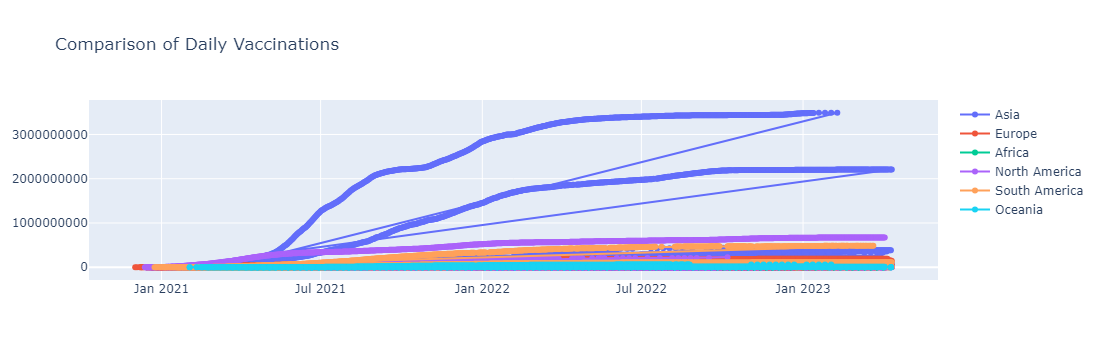

In [123]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=asia_vac['date'], y=asia_vac['total_vaccinations'], mode='lines+markers', name='Asia'))
fig.add_trace(go.Scatter(x=europe_vac['date'],y=europe_vac['total_vaccinations'], mode='lines+markers', name='Europe'))
fig.add_trace(go.Scatter(x=africa_vac['date'],y=africa_vac['total_vaccinations'], mode='lines+markers', name='Africa'))
fig.add_trace(go.Scatter(x=north_vac['date'],y=north_vac['total_vaccinations'], mode='lines+markers', name='North America'))
fig.add_trace(go.Scatter(x=south_vac['date'],y=south_vac['total_vaccinations'], mode='lines+markers', name='South America'))
fig.add_trace(go.Scatter(x=oceania_vac['date'],y=oceania_vac['total_vaccinations'], mode='lines+markers', name='Oceania'))
fig.update_layout(title='Comparison of Daily Vaccinations')
fig.update_layout(title='Comparison of Daily Vaccinations', yaxis=dict(tickformat='d'))
fig.show()